In [1]:
! pip install psycopg2

In [2]:
!pip install scikit-learn==1.4.2


In [3]:
import sklearn


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
import pandas as pd

# File path to the Excel file
file_path = '/content/AlcoMarketShare.xlsx'

try:
    # Read data from Excel file into a DataFrame
    df = pd.read_excel(file_path)

    print("Data imported successfully!")

    # Display basic statistics about the data
    print("\nData statistics:")
    print(df.describe())

except FileNotFoundError:
    print(f"File '{file_path}' not found.")

except Exception as e:
    print(f"An error occurred while importing data: {e}")


Data imported successfully!

Data statistics:
              Year  Market Demand (thousand tons)  ALCO Market Share (%)
count    24.000000                      24.000000              24.000000
mean   2006.625000                     711.250000              30.791667
std       5.814618                     223.160354               1.864524
min    2000.000000                     450.000000              28.000000
25%    2002.750000                     500.000000              29.750000
50%    2005.500000                     630.000000              30.500000
75%    2008.250000                     927.500000              32.000000
max    2020.000000                    1030.000000              35.000000


In [5]:
df.head()

,Year,Market Demand (thousand tons),ALCO Market Share (%),Groupe,Season Spike
0,2000,450,35,PF Ruminants,no data
1,2000,480,32,PF_Volailles,no data
2,2001,470,30,PF Ruminants,no data
3,2001,500,33,PF_Volailles,no data
4,2002,495,31,PF Ruminants,no data


In [6]:
print(df.isnull().sum())

Year                             0
Market Demand (thousand tons)    0
ALCO Market Share (%)            0
Groupe                           0
Season Spike                     0
dtype: int64


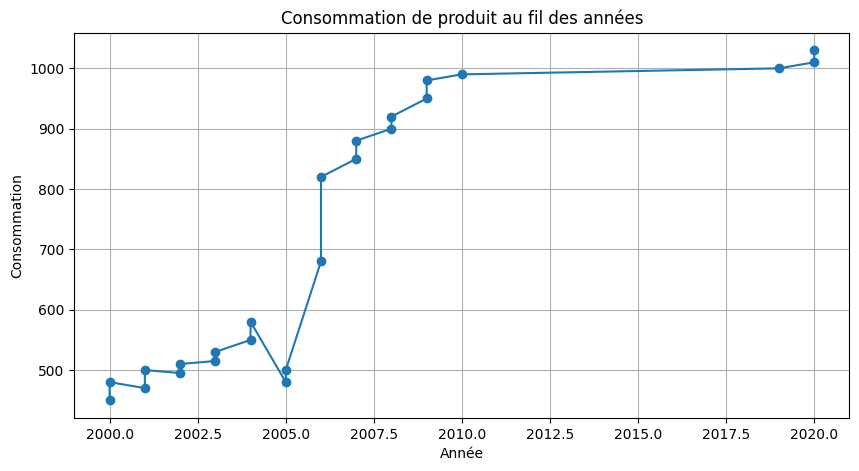

In [7]:
import matplotlib.pyplot as plt

# Tracer les données
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Market Demand (thousand tons)'], marker='o')
plt.title('Consommation de produit au fil des années')
plt.xlabel('Année')
plt.ylabel('Consommation')
plt.grid(True)
plt.show()

In [8]:
df_PF_Volailles = df[df['Groupe'] == 'PF_Volailles']

In [9]:
X_PF_Volailles = df_PF_Volailles['Year'].values.reshape(-1, 1)
y_PFVolailles_ = df_PF_Volailles['Market Demand (thousand tons)'].values

In [10]:
 X_train_Volailles, X_test_Volailles, y_train_Volailles, y_test_Volailles = train_test_split(X_PF_Volailles, y_PFVolailles_, test_size=0.2, random_state=42)


In [11]:
print(X_test_Volailles.shape)

(3, 1)


In [12]:
print(X_train_Volailles.shape)

(9, 1)


In [13]:
model_Volailles  = LinearRegression()



In [14]:
model_Volailles.fit(X_train_Volailles, y_train_Volailles)


LinearRegression()

In [15]:
X_test_Volailles

array([[2019],
       [2009],
       [2000]])

In [16]:
predictions_colaille = model_Volailles.predict(X_test_Volailles)


In [17]:
predictions_colaille

array([1094.5       ,  783.15217391,  502.93913043])

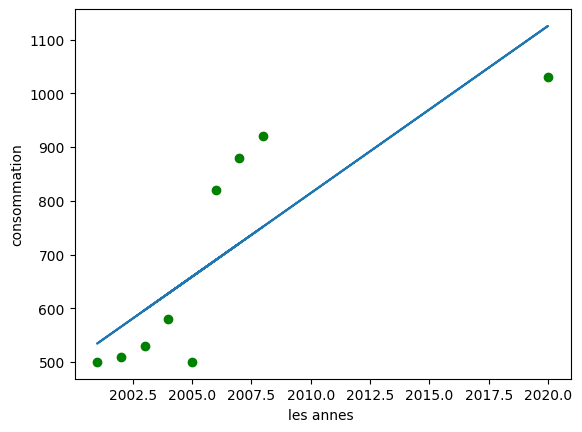

In [18]:
plt.scatter(X_train_Volailles,y_train_Volailles,color='green')
plt.plot(X_train_Volailles, model_Volailles.predict(X_train_Volailles))
plt.xlabel('les annes ')
plt.ylabel('consommation')
plt.show()

In [19]:
model_Volailles.score(X_test_Volailles,y_test_Volailles)

0.7223184312196669

In [20]:

from sklearn.metrics import r2_score
y_pred = model_Volailles.predict(X_test_Volailles)
print(r2_score(y_test_Volailles , y_pred).round(2)*100 ,"%")

72.0 %


***********
La méthode de Forêt Aléatoire (Random Forest) *******************

In [21]:
df_PF_Volailles = df[df['Groupe'] == 'PF_Volailles']

In [22]:
from sklearn.ensemble import RandomForestRegressor
X1 = df_PF_Volailles['Year'].values.reshape(-1, 1)
y1 = df_PF_Volailles['Market Demand (thousand tons)'].values
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# mse



In [23]:
 r2 = r2_score(y_test, predictions)
 print("Le score R² est :", r2)

Le score R² est : 0.9432292050691244


Explication du R² :
R² = 1 : Le modèle prédit parfaitement les valeurs réelles.
R² = 0 : Le modèle ne fait pas mieux que de prédire la moyenne des valeurs observées.
R² < 0 : Le modèle est pire que la prédiction de la moyenne.

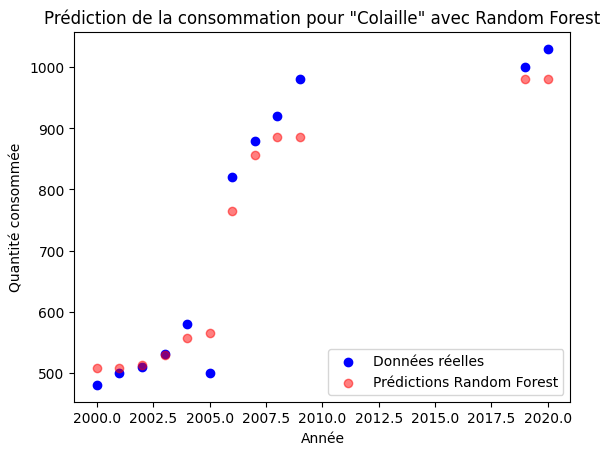

In [24]:
redictions_all = model.predict(X1)
plt.scatter(X1, y1, color='blue', label='Données réelles')
plt.scatter(X1, redictions_all, color='red', label='Prédictions Random Forest', alpha=0.5)
plt.title('Prédiction de la consommation pour "Colaille" avec Random Forest')
plt.xlabel('Année')
plt.ylabel('Quantité consommée')
plt.legend()
plt.show()

In [25]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

def train_and_save_model(df):
    # Prepare data
    X = df['Year'].values.reshape(-1, 1)
    y = df['Market Demand (thousand tons)'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print("R² score:", r2)

    # Save model to joblib file
    joblib.dump(model, "random_forest_model.joblib")


train_and_save_model(df_PF_Volailles)




R² score: 0.9432292050691244
